In [1]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (8.0, 8.0)
import time

In [13]:
from CameraNetwork.cameras import IDSCamera
import CameraNetwork.global_settings as gs
from CameraNetwork.sunshader import SunShader

In [14]:
cam = IDSCamera()
sn = SunShader()

In [12]:
%timeit capture()

10 loops, best of 3: 31.7 ms per loop


In [15]:
cam.small_size()

#
# 'Reset' the sunshader.
#
sn.setAngle(gs.SUNSHADER_MIN_ANGLE)
time.sleep(1)

saturated_array = []
for i in range(gs.SUNSHADER_MIN_ANGLE, gs.SUNSHADER_MAX_ANGLE):
    sn.setAngle(i)
    img, _, _ = cam.capture(
        settings={
            "exposure_us": 50,
            "gain_db": None,
            "gain_boost": True,
            "color_mode": gs.COLOR_RGB
        }
    )
    saturated_array.append(img[...,2])

cam.large_size()

AttributeError: 'NoneType' object has no attribute 'subsampling'

In [11]:
def calc_sunshade():
    small_size()
    cam.exposure = 0.050
    _, _ = capture()
    array = []
    sn.setAngle(20)
    time.sleep(0.5)
    for i in range(20, 160):
        sn.setAngle(i)
        time.sleep(0.05)
        img = capture()[0]
        array.append((img[...,2] == 255).sum())
        
    vals = -np.array(array)
    thresh = (vals.max() + vals.min())/2
    signal = vals > thresh
    
    x = np.arange(20, 160)
    new_angle = (signal*x).sum()/signal.sum()
    print new_angle
    sn.setAngle(new_angle)
    time.sleep(0.5)

128.5


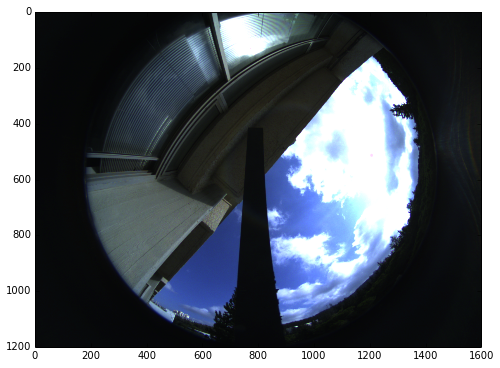

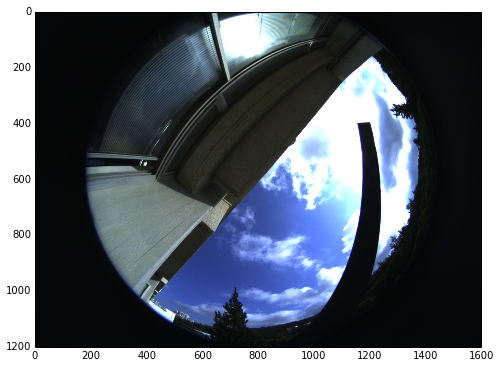

In [12]:
large_size()
cam.exposure = 1
_, _ = capture()
img, _ = capture()
plt.figure()
plt.imshow(img)

calc_sunshade()

large_size()
cam.exposure = 1
_, _ = capture()
img, _ = capture()
plt.figure()
plt.imshow(img)

In [153]:
cam.exposure = 2000

In [154]:
cam.exposure

1999.9092

In [152]:
cam.pixelclock = 5

In [149]:
cam.framerate

2.084167000133387